# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

## Observable Trends

- It appears that as you approach +20 degrees latitude temperatures are highest. This is interesting to me, as I would have assumed temperatures right at the equator would be hottest, but temperatures trend to the warmest weather just north of the equator.

- I do not see a correlation between latitude and cloudiness. I thought there might be a bit more cloudiness near the equator, but the scatter plots show cloudiness can vary regardless of how close or how far away from the equator a city is.

- I thought humidity would be closest to the equator as well, but again, it does not seem there is a correlation between latitude and humidity. I find it interesting that as you move south of the equator a high percentage of these cities have humidity reaching over 60%.

In [19]:
# ! pip install citipy
# ! pip install "requests[security]" 
# (https://stackoverflow.com/questions/38853972/python-client-error-connection-reset-by-peer)

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

595

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# save config information
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={api_key}&units={units}&q="

In [5]:
# perform a weather check on each city using API calls

# create lists to store data
city_name = []
country = []
temp = []
humid = []
cloud = []
wind = []
latitude = []
longitude = []
date = []

# create a row counter set to 1
count = 1
# create set counter set to 1 (to match sample)
set_count = 1

print("Beginning Data Retrieval")
print("-----------------------------")

for city in cities:
    response = requests.get(query_url + city).json()
    try:
        print(f"Processing Record {count} of Set {set_count} | {city}")
        # add information to variable lists
        city_name.append(response["name"])
        country.append(response["sys"]["country"])
        temp.append(response["main"]["temp_max"])
        humid.append(response["main"]["humidity"])
        cloud.append(response["clouds"]["all"])
        wind.append(response["wind"]["speed"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        date.append(response["dt"])
        
        # update row counter
        count += 1

    except:
        print("City not found. Skipping...")
        
        # update row counter
        count += 1

    # update the set at 50 records
    if count == 51:
        set_count += 1
        count = 1
              
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 2 of Set 1 | longyearbyen
Processing Record 3 of Set 1 | saint george
Processing Record 4 of Set 1 | tasbuget
City not found. Skipping...
Processing Record 5 of Set 1 | cabo san lucas
Processing Record 6 of Set 1 | cidreira
Processing Record 7 of Set 1 | souillac
Processing Record 8 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 9 of Set 1 | sarakhs
Processing Record 10 of Set 1 | ostrovnoy
Processing Record 11 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 12 of Set 1 | gizo
Processing Record 13 of Set 1 | tessalit
Processing Record 14 of Set 1 | axim
Processing Record 15 of Set 1 | dikson
Processing Record 16 of Set 1 | salaga
Processing Record 17 of Set 1 | santiago del estero
Processing Record 18 of Set 1 | new norfolk
Processing Record 19 of Set 1 | torbay
Processing Record 20 of Set 1 | thompson
Proce

Processing Record 37 of Set 4 | valdivia
Processing Record 38 of Set 4 | maralal
Processing Record 39 of Set 4 | alofi
Processing Record 40 of Set 4 | richards bay
Processing Record 41 of Set 4 | brae
Processing Record 42 of Set 4 | bavly
Processing Record 43 of Set 4 | teahupoo
Processing Record 44 of Set 4 | santa barbara
Processing Record 45 of Set 4 | kapaa
Processing Record 46 of Set 4 | sao joao da barra
Processing Record 47 of Set 4 | lasa
Processing Record 48 of Set 4 | copiapo
Processing Record 49 of Set 4 | mananjary
Processing Record 50 of Set 4 | nakusp
Processing Record 1 of Set 5 | porto novo
Processing Record 2 of Set 5 | upernavik
Processing Record 3 of Set 5 | sinnamary
Processing Record 4 of Set 5 | salinas
Processing Record 5 of Set 5 | yulara
Processing Record 6 of Set 5 | caravelas
Processing Record 7 of Set 5 | lagoa
Processing Record 8 of Set 5 | ibadan
Processing Record 9 of Set 5 | beringovskiy
Processing Record 10 of Set 5 | sentyabrskiy
City not found. Skippi

Processing Record 26 of Set 8 | maumere
Processing Record 27 of Set 8 | chokurdakh
Processing Record 28 of Set 8 | skelleftea
Processing Record 29 of Set 8 | labuhan
Processing Record 30 of Set 8 | saint-pierre
Processing Record 31 of Set 8 | dinguiraye
Processing Record 32 of Set 8 | jeremie
Processing Record 33 of Set 8 | barawe
City not found. Skipping...
Processing Record 34 of Set 8 | mastic beach
Processing Record 35 of Set 8 | muroto
Processing Record 36 of Set 8 | chagda
City not found. Skipping...
Processing Record 37 of Set 8 | tabuk
Processing Record 38 of Set 8 | fairbanks
Processing Record 39 of Set 8 | sitka
Processing Record 40 of Set 8 | marquette
Processing Record 41 of Set 8 | half moon bay
Processing Record 42 of Set 8 | teixoso
Processing Record 43 of Set 8 | lazaro cardenas
Processing Record 44 of Set 8 | mutare
Processing Record 45 of Set 8 | zhezkazgan
Processing Record 46 of Set 8 | novo aripuana
Processing Record 47 of Set 8 | new milford
Processing Record 48 o

Processing Record 13 of Set 12 | olinda
Processing Record 14 of Set 12 | haibowan
City not found. Skipping...
Processing Record 15 of Set 12 | umzimvubu
City not found. Skipping...
Processing Record 16 of Set 12 | port blair
Processing Record 17 of Set 12 | tumannyy
City not found. Skipping...
Processing Record 18 of Set 12 | tezu
Processing Record 19 of Set 12 | rustam
City not found. Skipping...
Processing Record 20 of Set 12 | pembroke
Processing Record 21 of Set 12 | namie
Processing Record 22 of Set 12 | oga
Processing Record 23 of Set 12 | vagay
Processing Record 24 of Set 12 | praia
Processing Record 25 of Set 12 | tynda
Processing Record 26 of Set 12 | reidsville
Processing Record 27 of Set 12 | sunland park
Processing Record 28 of Set 12 | conchal
Processing Record 29 of Set 12 | palabuhanratu
City not found. Skipping...
Processing Record 30 of Set 12 | gaogou
Processing Record 31 of Set 12 | bubaque
Processing Record 32 of Set 12 | sambava
Processing Record 33 of Set 12 | lag

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:
weather_df = pd.DataFrame({"City":city_name,
                           "Country":country,
                          "Max Temperature (F)":temp,
                          "Humidity (%)":humid,
                          "Cloudiness (%)":cloud,
                          "Wind Speed (mph)":wind,
                          "Latitude":latitude,
                          "Longitude":longitude,
                          "Date":date})

weather_df.count()

City                   537
Country                537
Max Temperature (F)    537
Humidity (%)           537
Cloudiness (%)         537
Wind Speed (mph)       537
Latitude               537
Longitude              537
Date                   537
dtype: int64

In [12]:
weather_df.head()

,City,Country,Max Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Latitude,Longitude,Date
0,Longyearbyen,NO,35.60,69,75,17.22,78.22,15.63,1559264062
1,Saint George,GR,64.40,59,40,4.94,39.45,22.34,1559264063
2,Cabo San Lucas,MX,84.99,60,5,16.11,22.89,-109.91,1559264007
3,Cidreira,BR,62.72,76,100,19.98,-30.17,-50.22,1559264063
4,Souillac,FR,57.99,87,0,1.12,45.60,-0.60,1559264064


In [13]:
#output
weather_df.to_csv("../output_data/cities.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

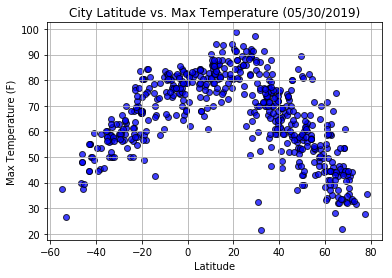

In [15]:
plt.scatter(weather_df["Latitude"], weather_df["Max Temperature (F)"], marker='o', facecolor='b', 
            edgecolor='black', alpha=0.75)

# labels
plt.title("City Latitude vs. Max Temperature (05/30/2019)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# save figure as .png
plt.savefig("../final_images/lat_vs_temp.png")

#### Latitude vs. Humidity Plot

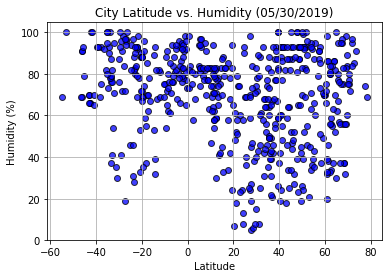

In [16]:
plt.scatter(weather_df["Latitude"], weather_df["Humidity (%)"], marker='o', facecolor='b', 
            edgecolor='black', alpha=0.75)

# labels
plt.title("City Latitude vs. Humidity (05/30/2019)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# save figure as .png
plt.savefig("../final_images/lat_vs_humidity.png")

#### Latitude vs. Cloudiness Plot

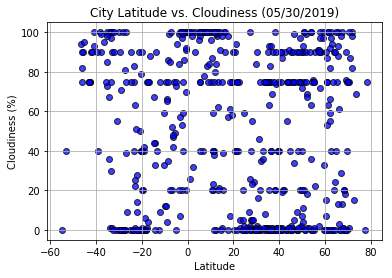

In [17]:
plt.scatter(weather_df["Latitude"], weather_df["Cloudiness (%)"], marker='o', facecolor='b', 
            edgecolor='black', alpha=0.75)

# labels
plt.title("City Latitude vs. Cloudiness (05/30/2019)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# save figure as .png
plt.savefig("../final_images/lat_vs_cloudiness.png")

#### Latitude vs. Wind Speed Plot

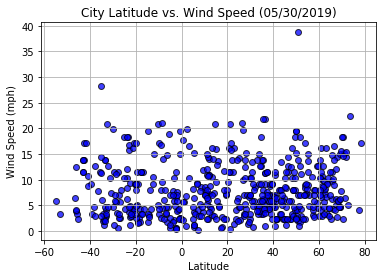

In [18]:
plt.scatter(weather_df["Latitude"], weather_df["Wind Speed (mph)"], marker='o', facecolor='b', 
            edgecolor='black', alpha=0.75)

# labels
plt.title("City Latitude vs. Wind Speed (05/30/2019)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# save figure as .png
plt.savefig("../final_images/lat_vs_windspeed.png")